In [12]:
import pandas as pd

print("We load the masked version of openAI embeddings along with the metadata (full tabular dataset)")
df = pd.read_parquet("../m-player+team_asr-corr_mdl-openai-oai_emb3_ck-t512-o256.parquet")
df = df.sort_values("date")

from predictions.sequence_dataset import build_sequence_dataset
from features import embedding_feature_fn

print("Then transform it to arrive at sequential inferred dataset")
data = build_sequence_dataset(
    df,
    k_history=8,
    min_history=4,
    pad_to_k=True,
    feature_fn=embedding_feature_fn,
    target_column="team1_result",
)

We load the masked version of openAI embeddings along with the metadata (full tabular dataset)
Then transform it to arrive at sequential inferred dataset


To explore we load the analysis scripts and use them to plot the 2d pca structure.
Explained variance ratio (PC1, PC2.. PCN): [0.03015184 0.02919659]
Total explained variance by first 2 PCs: 5.93%


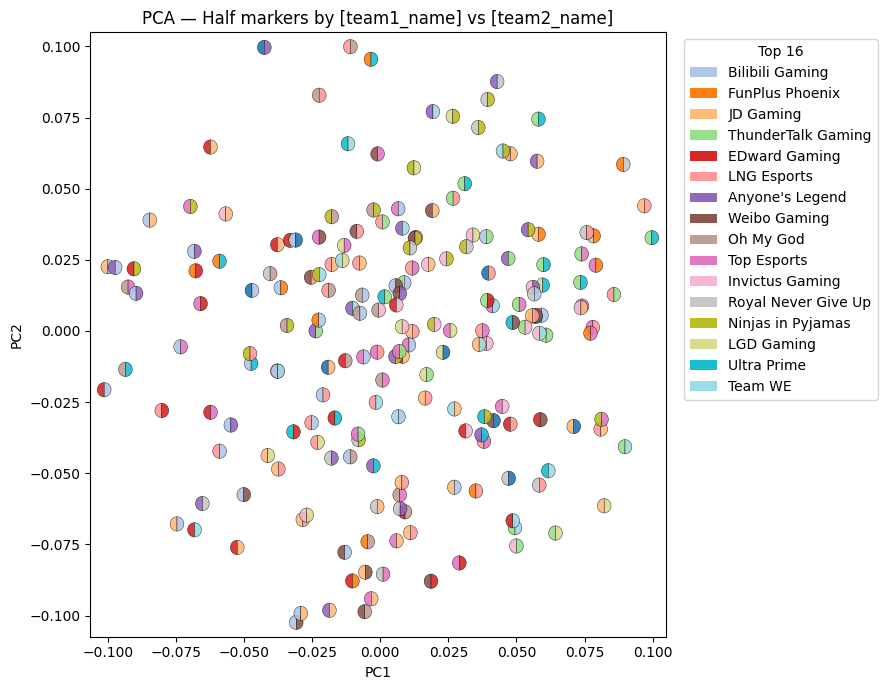

Saved: pca_half_pies_by_teams.png


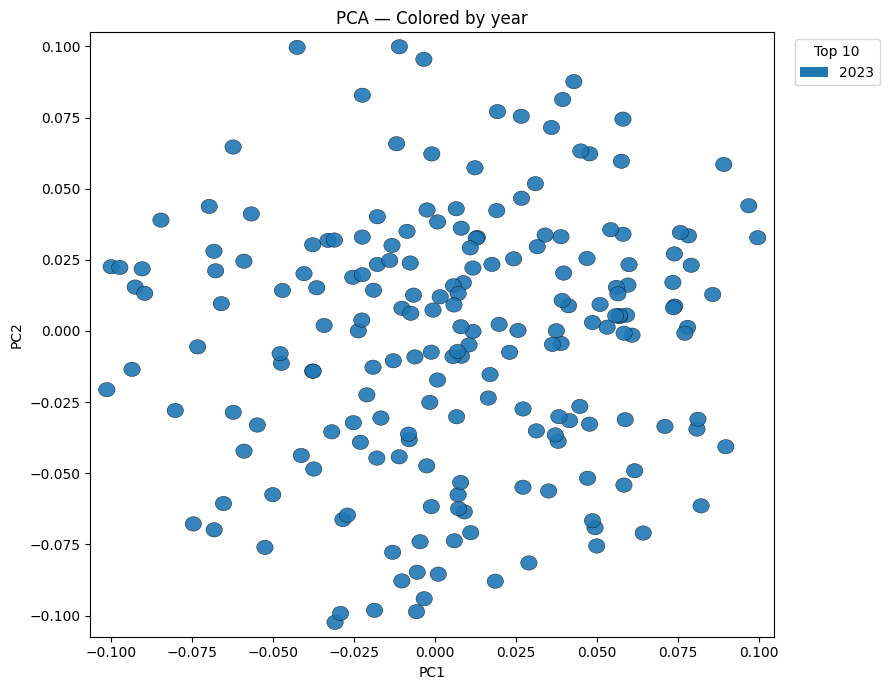

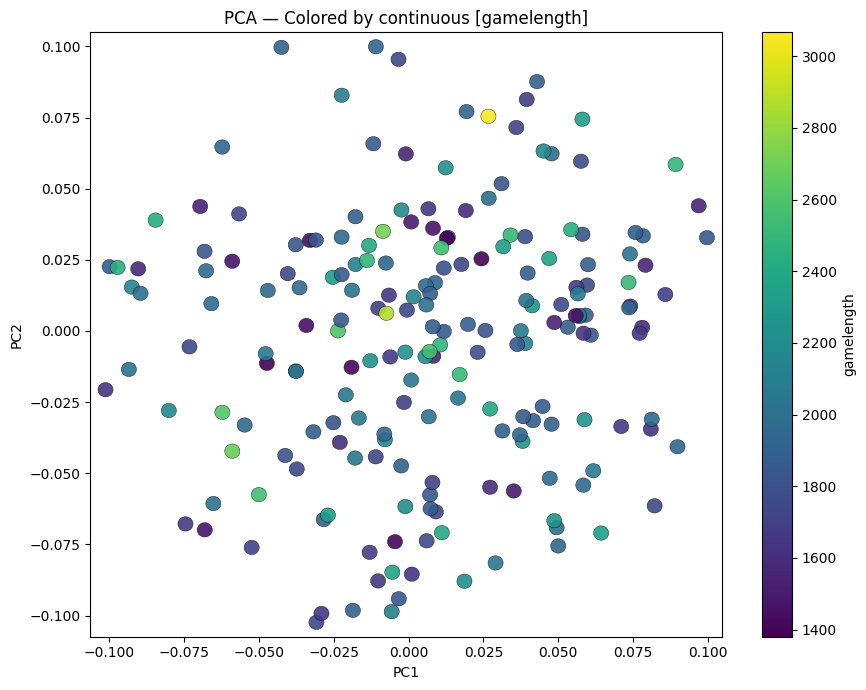

(<Figure size 900x700 with 2 Axes>,
 <Axes: title={'center': 'PCA — Colored by continuous [gamelength]'}, xlabel='PC1', ylabel='PC2'>)

In [16]:
print("To explore we load the analysis scripts and use them to plot the 2d pca structure.")
from data_analysis.embedding_pca_analysis import pca_full_markers_pipeline, pca_half_markers_pipeline, run_pca_and_attach
n_outliers_to_omit = 300
df_before_pca = df_pca.copy()
####
# Try to uncomment, pretending the 2025 season is excluded from the data
#df_before_pca = df_before_pca[df_before_pca["year"] != 2025]

# Or that the season is fixed to e.g. 2023
#df_before_pca = df_before_pca[df_before_pca["year"] == 2023]
#n_outliers_to_omit = 50
####

# Quick derived features for optional coloring/filtering in PCA plots.
df_before_pca["total_kills"] = df_before_pca["team1_kills"] + df_before_pca["team2_kills"]
df_before_pca["kill_diff_abs"] = (df_before_pca["team1_kills"] - df_before_pca["team2_kills"]).abs()


# Run PCA ONCE on the full dataset, then do any filtering on the resulting df_pca.
n_components = 2
df_pca, X_pca, evr, pca = run_pca_and_attach(
    df_before_pca,
    emb_col="embedding",
    n_components=n_components,
    random_state=42,
    x_col="pca_x",
    y_col="pca_y",
    n_outliers_to_omit=n_outliers_to_omit,  # drop farthest points to improve plot readability
)


# --- Plot A: half markers for team names
pca_half_markers_pipeline(
    df_pca,
    left_col="team1_name",
    right_col="team2_name",
    legend_top_n=16,
    radius_factor=0.0125,
    cmap_name="tab20",
    save_path="pca_half_pies_by_teams.png",
    show=True,
)
print("Saved: pca_half_pies_by_teams.png")

# --- Plot B1: categorical coloring (example: year) ---
pca_full_markers_pipeline(
    df_pca,
    color_cols="year",
    legend_top_n=10,
    radius_factor=0.0125,
    cmap_name="tab20",
    save_path="pca_by_year_categorical.png",
    show=True,
    continuous=False,
)

# --- Plot B2: continuous coloring (example: game length) ---
pca_full_markers_pipeline(
    df_pca,
    color_cols="gamelength",
    legend_top_n=10,
    radius_factor=0.0125,
    cmap_name="tab20",
    save_path="pca_by_continous.png",
    show=True,
    continuous=True,
)

In [17]:
print("For the predictive task itself, model config and model training we refer to the user and technical documentation of how to run the file predictions/run_experiment.py inside of the README.md file.")

For the predictive task itself, model config and model training we refer to the user and technical documentation of how to run the file predictions/run_experiment.py inside of the README.md file.
